# Análisis exploratorios

## Objetivos

* Probar y crear códigos varios
* Crear figuras
* Generar insights
* Crear y almacenar DFs específicos para figuras o análisis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Objetivo especifico de las siguientes celdas

* Cargar 'riqueza.csv'
* Crear df con el total de intervalos de 5 min
* Guardarlo como 'fulltime_riqueza.csv'

In [4]:
file_path = r'C:\Users\camil\OneDrive - Universidad Austral de Chile\datascience1\proyectoDS_parte1\Data_Science_ll\entrega_1\riqueza.csv'

df = pd.read_csv(file_path) 
df_validated = df[df['validated'] != '(not validated)']
df_validated.head()

,id,recording,site,year,month,day,hour,minute,species,songtype,x1,x2,y1,y2,frequency,validated,url,score,site_id,presencia
0,627470889,SMM09557_20231009_185000.wav,P04_SMM09557,2023,10,9,18,50,Theristicus melanopis,Common Song,19.210667,25.461333,796.875,2390.625,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.308460,48814,1
12,627488167,SMM09309_20231010_122000.wav,P39_SMM09309,2023,10,10,12,20,Theristicus melanopis,Common Song,7.093333,13.344000,796.875,2390.625,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.319604,48993,0
13,627488435,SMM09360_20231010_144000.wav,P23_SMM09360,2023,10,10,14,40,Theristicus melanopis,Common Song,44.117333,50.368000,796.875,2390.625,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.320364,48816,0
14,627488436,SMM09360_20231010_144500.wav,P23_SMM09360,2023,10,10,14,45,Theristicus melanopis,Common Song,20.266667,26.517333,796.875,2390.625,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.347267,48816,0
15,627488437,SMM09360_20231010_100500.wav,P23_SMM09360,2023,10,10,10,5,Theristicus melanopis,Common Song,42.976000,49.226667,796.875,2390.625,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.323306,48816,1


In [5]:
# Crear una columna de fecha a partir de las columnas 'year', 'month' y 'day'
df_validated['date'] = pd.to_datetime(df_validated[['year', 'month', 'day']])

# Contar la frecuencia de cada especie por fecha
frecuencia_especies = df_validated.groupby(['date', 'species']).size().unstack(fill_value=0)

C:\Users\camil\AppData\Local\Temp\ipykernel_9776\3658168661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validated['date'] = pd.to_datetime(df_validated[['year', 'month', 'day']])


In [13]:
df_validated.head()

,id,recording,site,year,month,day,hour,minute,species,songtype,...,x2,y1,y2,frequency,validated,url,score,site_id,presencia,date
0,627470889,SMM09557_20231009_185000.wav,P04_SMM09557,2023,10,9,18,50,Theristicus melanopis,Common Song,...,25.461333,796.875,2390.625,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.308460,48814,1,2023-10-09
12,627488167,SMM09309_20231010_122000.wav,P39_SMM09309,2023,10,10,12,20,Theristicus melanopis,Common Song,...,13.344000,796.875,2390.625,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.319604,48993,0,2023-10-10
13,627488435,SMM09360_20231010_144000.wav,P23_SMM09360,2023,10,10,14,40,Theristicus melanopis,Common Song,...,50.368000,796.875,2390.625,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.320364,48816,0,2023-10-10
14,627488436,SMM09360_20231010_144500.wav,P23_SMM09360,2023,10,10,14,45,Theristicus melanopis,Common Song,...,26.517333,796.875,2390.625,12000,not present,https://rfcx-streams-production.s3.eu-west-1.a...,0.347267,48816,0,2023-10-10
15,627488437,SMM09360_20231010_100500.wav,P23_SMM09360,2023,10,10,10,5,Theristicus melanopis,Common Song,...,49.226667,796.875,2390.625,12000,present,https://rfcx-streams-production.s3.eu-west-1.a...,0.323306,48816,1,2023-10-10


In [17]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
# Ejemplo: df = pd.read_csv('tu_archivo.csv')

# Filtrar solo registros donde la especie está presente
df_presente = df_validated[df_validated['presencia'] == 1]

# Crear tabla de abundancia: filas = date, columnas = species, valores = conteo de registros
abundancia = df_presente.pivot_table(
    index='date',          # o 'site' si quieres por sitio
    columns='species',
    values='presencia',    # o cualquier columna con valores 1 para presencia
    aggfunc='count',       # contar ocurrencias
    fill_value=0
)

# Opcional: ordenar por fecha
abundancia.sort_index(inplace=True)

# Guardar a CSV para análisis posterior (curva de rarefacción)
abundancia.to_csv('rarefaccion.csv')

print("Archivo 'rarefaccion.csv' guardado con éxito.")


Archivo 'rarefaccion.csv' guardado con éxito.


c:\Users\camil\soundscape311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\camil\soundscape311\Lib\site-packages\ecopy\diversity\rarefy.py:146: RuntimeWarning: invalid value encountered in scalar divide
  sBar = Sn -  np.sum(comb(n-x, i))/comb(n, i)
c:\Users\camil\soundscape311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\camil\soundscape311\Lib\site-packages\ecopy\diversity\rarefy.py:146: RuntimeWarning: invalid value encountered in scalar divide
  sBar = Sn -  np.sum(comb(n-x, i))/comb(n, i)
c:\Users\camil\soundscape311\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\camil\soundscape311\Lib\site-packages\ecopy\diversity\rarefy.py:146: Runti

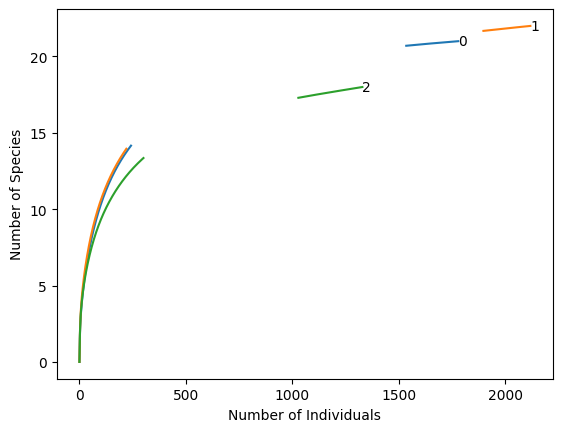

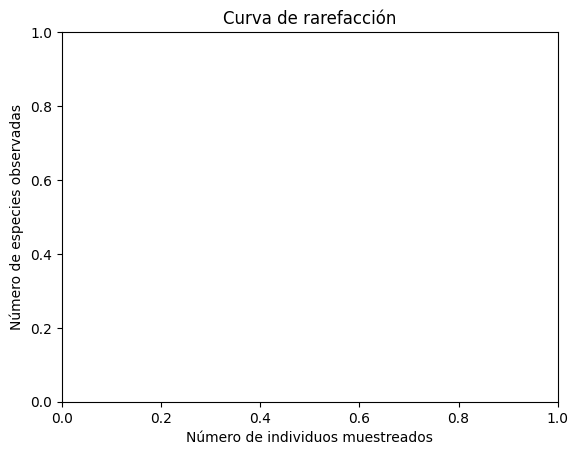

In [27]:
# Curva de rarefacción
from scipy.special import comb
import scipy.misc
scipy.misc.comb = comb  # parche temporal

import ecopy as ep

df_abundancia = pd.read_csv('rarefaccion.csv')

df_abundancia.set_index('date', inplace=True)

## Convertir a numérico por si acaso (evitar errores por strings o NaN)
abundancia_numeric = df_abundancia.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Pasar solo los valores (sin el índice) a rarefacción
ep.rarefy(abundancia_numeric.values, method='rarecurve')

plt.xlabel('Número de individuos muestreados')
plt.ylabel('Número de especies observadas')
plt.title('Curva de rarefacción')
plt.show()

In [26]:
abundancia_numeric.head()

,Anairetes parulus,Aphrastura spinicauda,Colorhamphus parvirostris,Curaeus curaeus,Dryobates lignarius,Elaenia albiceps,Enicognathus ferrugineus,Eugralla paradoxa,Glaucidium nana,Milvago chimango,...,Sicalis luteola,Strix rufipes,Sturnella loyca,Theristicus melanopis,Troglodytes aedon,Turdus falcklandii,Tyto alba,Vanellus chilensis,Xolmis pyrope,Zonotrichia capensis
date,,,,,,,,,,,,,,,,,,,,,
2023-10-08,5,135,6,0,0,53,2,1,0,5,...,0,12,3,29,0,33,4,11,1,3
2023-10-09,3,280,4,1,8,80,4,1,1,0,...,2,16,15,12,0,46,0,6,10,0
2023-10-10,0,152,5,0,0,47,3,0,1,3,...,0,5,4,13,1,33,8,12,0,0
